In [1]:
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
import pydicom
from tqdm import tqdm
import pandas as pd
from matplotlib import pyplot as plt
import os
import time
import numpy as np
import cv2
import numpy as np

In [5]:
train = pd.read_csv(r"C:\Users\D. RHUTHVIK\Desktop\Final Year Project\train.csv")

In [6]:
train

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
2,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
3,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
4,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
...,...,...,...,...,...,...,...,...
1681,1733,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1682,1734,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88978469234834814481...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1683,1735,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1684,1736,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...


In [7]:
from sklearn.model_selection import train_test_split   
y = train.Label
X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50, stratify = X['Label'])

In [8]:
y_train.value_counts()

Chest                              651
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      68
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Thoracic Spine                      13
Finger                              13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [9]:
X_train.Label.value_counts()

Chest                              651
Others                             108
Knee                                92
Abdomen                             72
Cervical Spine                      68
Feet                                63
Pelvis                              60
Wrist                               57
Lumbar Spine and Thoracic Spine     40
Hand and Wrist                      38
Ankle                               37
Shoulder                            36
Lumbar Spine                        35
Hand                                28
Sinus                               21
Elbow                               21
Hip                                 17
Lower Leg                           17
Thoracic Spine                      13
Finger                              13
Forearm                             11
Abdomen and Chest                   10
Skull                                9
Name: Label, dtype: int64

In [10]:
X_test.Label.value_counts()

Chest                              72
Others                             12
Knee                               10
Abdomen                             8
Cervical Spine                      8
Feet                                7
Pelvis                              7
Wrist                               6
Lumbar Spine and Thoracic Spine     5
Lumbar Spine                        4
Hand and Wrist                      4
Shoulder                            4
Ankle                               4
Hand                                3
Sinus                               2
Elbow                               2
Thoracic Spine                      2
Hip                                 2
Lower Leg                           2
Finger                              2
Skull                               1
Forearm                             1
Abdomen and Chest                   1
Name: Label, dtype: int64

In [11]:
X_test

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
1452,1497,E:/dataset/train\train\812\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.63176240848170098686...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1644,1696,E:/dataset/train\train\958\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.17521521854093127188...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
561,575,E:/dataset/train\train\1372\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.40821008868450046764...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
361,371,E:/dataset/train\train\1254\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.36121912364078781887...,14,Others,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1236,1275,E:/dataset/train\train\643\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.85495648454557212778...,6,Feet,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
...,...,...,...,...,...,...,...,...
1560,1606,E:/dataset/train\train\890\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12336783553322800699...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1131,1167,E:/dataset/train\train\556\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.28370348751846810315...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
148,152,E:/dataset/train\train\1115\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.53353431970886790908...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
61,62,E:/dataset/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...


In [12]:
X_train = X_train.sort_index(ascending=True)
X_train

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
2,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
3,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
4,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
...,...,...,...,...,...,...,...,...
1680,1732,E:/dataset/train\train\994\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.73111358555919845078...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1681,1733,E:/dataset/train\train\996\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.88201401328037140717...,10,Hip,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1683,1735,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.33303514480609398517...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1684,1736,E:/dataset/train\train\997\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.13310561881659972417...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...


In [13]:
y_train = y_train.sort_index(ascending=True)
y_train

0                Chest
1                Chest
2                Chest
3                Chest
4                Chest
             ...      
1680             Chest
1681               Hip
1683    Cervical Spine
1684             Chest
1685            Pelvis
Name: Label, Length: 1517, dtype: object

In [14]:
X_test = X_test.sort_index(ascending=True)
X_test

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
5,6,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
19,20,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
28,29,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
36,37,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
39,40,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
...,...,...,...,...,...,...,...,...
1641,1693,E:/dataset/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1644,1696,E:/dataset/train\train\958\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.17521521854093127188...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1659,1711,E:/dataset/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1664,1716,E:/dataset/train\train\974\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.58968424957657772244...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...


In [15]:
train.Imagepath[0]

'E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png'

In [16]:
y_test = y_test.sort_index(ascending=True)
y_test

5                        Hand and Wrist
19                                Wrist
28                                 Knee
36                                 Knee
39                                Wrist
                     ...               
1641    Lumbar Spine and Thoracic Spine
1644                              Chest
1659                              Chest
1664                              Chest
1682                             Pelvis
Name: Label, Length: 169, dtype: object

In [17]:
y=set(X_train.Label)

In [18]:
y=list(y)

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

In [20]:
z=le.transform(X_train.Label)

In [21]:
X_train['enum']=z

In [22]:
len(X_train)

1517

In [23]:
X_train.head(10)

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
2,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
3,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
4,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
6,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
7,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,3
8,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,17
9,10,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,12
10,11,E:/dataset/train\train\1007\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.45845296073387348321...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4


In [24]:
X_train = X_train.reset_index()
X_train.head(10)

,index,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
2,2,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
3,3,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
4,4,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
5,6,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
6,7,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,3
7,8,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,17
8,9,10,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,12
9,10,11,E:/dataset/train\train\1007\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.45845296073387348321...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4


In [25]:
X_train.head(10)

,index,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
2,2,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
3,3,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
4,4,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
5,6,7,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.15916540756113733490...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
6,7,8,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.18487623914375706231...,2,Cervical Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,3
7,8,9,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.78401161739580676973...,15,Pelvis,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,17
8,9,10,E:/dataset/train\train\1006\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.86102441993547934252...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,12
9,10,11,E:/dataset/train\train\1007\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.45845296073387348321...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4


In [26]:
y_train = y_train.reset_index()
y_train.drop(['index'], axis = 1, inplace = True)
y_train.head(10)

,Label
0,Chest
1,Chest
2,Chest
3,Chest
4,Chest
5,Chest
6,Cervical Spine
7,Pelvis
8,Knee
9,Chest


In [27]:
X_test = X_test.reset_index()
X_test.drop(['index'], axis = 1, inplace = True)
X_test.head(10)

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath
0,6,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
1,20,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
2,29,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
3,37,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
4,40,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
5,44,E:/dataset/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12955484645689261949...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
6,45,E:/dataset/train\train\1032\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.50936077508977170899...,13 20,Lumbar Spine and Thoracic Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
7,62,E:/dataset/train\train\104\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72558621588625374076...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
8,73,E:/dataset/train\train\1042\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12508457306413949046...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...
9,86,E:/dataset/train\train\1055\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.49042641191949792629...,0,Abdomen,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...


In [28]:
y_test = y_test.reset_index()
y_test.drop(['index'], axis = 1, inplace = True)
y_test.head(10)

,Label
0,Hand and Wrist
1,Wrist
2,Knee
3,Knee
4,Wrist
5,Chest
6,Lumbar Spine and Thoracic Spine
7,Abdomen
8,Chest
9,Abdomen


In [29]:
d = []

In [30]:
for i in range(len(X_train)):
    d.append(((X_train.Imagepath[i],int(X_train.enum[i]))))
    

In [31]:
type(z)

numpy.ndarray

In [32]:
X_train.enum

0        4
1        4
2        4
3        4
4        4
        ..
1512     4
1513    11
1514     3
1515     4
1516    17
Name: enum, Length: 1517, dtype: int32

In [33]:
d

[('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.65452424240994805812717428674475343109.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.37634180084111795685928688942145555908.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.12781870272366327239431992873991536152.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.47572155867413808436639828301877907300.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.15916540756113733490766234439378064771.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.18487623914375706231172360173248146829.png',
  3),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.78401161739580676973623271087262413160.png',
  17),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.86102441993547934252270462047774306098.png',
  12),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.458452960

In [34]:
X_train.head()

,index,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,0,0,E:/dataset/train\train\1\1.2.826.0.1.3680043.8...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.65452424240994805812...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
1,1,1,E:/dataset/train\train\10\1.2.826.0.1.3680043....,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.29960944389705651248...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
2,2,3,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.37634180084111795685...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
3,3,4,E:/dataset/train\train\1002\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12781870272366327239...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
4,4,5,E:/dataset/train\train\1004\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.47572155867413808436...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4


In [35]:
X_train.Imagepath[1]

'E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.29960944389705651248668522443366935719.png'

In [36]:
y = le.transform(X_test.Label)

In [37]:
y

array([10, 22, 12, 12, 22,  4, 15,  0,  4,  0,  0, 18,  3,  4,  4,  4,  0,
        4,  4,  4, 17,  4, 13,  4, 13, 16, 17,  4,  2,  2,  4, 12, 12, 18,
       16, 17,  4,  7, 14,  4, 19, 19,  4, 11,  0,  4,  4,  4,  4,  3,  4,
        4,  4,  4,  4,  7, 22, 12, 21, 21,  4,  0,  9, 11,  4,  4, 16,  4,
        5,  4,  3,  4,  6, 16,  4,  4, 12, 12,  4, 14, 16,  4, 15,  4,  4,
        3, 15,  3, 16,  4,  9, 17, 12,  4,  3, 16,  4, 22,  6,  6,  4,  5,
        4, 12, 18,  4,  4,  4, 14, 18,  4, 10,  4,  4,  4,  8,  4, 14,  2,
       16,  9,  4,  6,  4,  4,  3, 17, 16, 12,  6,  1, 20, 10,  4,  4,  3,
        4, 10, 15,  4, 16, 16,  4, 22,  4, 22,  4,  4,  4,  4,  4,  0,  4,
        4, 16,  6,  4, 17,  2,  4,  0,  4,  4,  6, 15,  4,  4,  4, 17])

In [38]:
X_test["enum"] = y

In [39]:
X_test

,Unnamed: 0,Filename,PhotometricInterpretation,BitsAllocated,SOPInstanceUID,Target,Label,Imagepath,enum
0,6,E:/dataset/train\train\1005\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.75243637122822422802...,9 21,Hand and Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,10
1,20,E:/dataset/train\train\1016\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.12961416485268413761...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,22
2,29,E:/dataset/train\train\1025\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.99227641053114131427...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,12
3,37,E:/dataset/train\train\1026\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.72908203752062511272...,11,Knee,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,12
4,40,E:/dataset/train\train\1028\1.2.826.0.1.368004...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.59409306263004590952...,21,Wrist,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,22
...,...,...,...,...,...,...,...,...,...
164,1693,E:/dataset/train\train\955\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.46995447179630810082...,13 20,Lumbar Spine and Thoracic Spine,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,15
165,1696,E:/dataset/train\train\958\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.17521521854093127188...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
166,1711,E:/dataset/train\train\970\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.11142749741335643457...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4
167,1716,E:/dataset/train\train\974\1.2.826.0.1.3680043...,MONOCHROME1,16,1.2.826.0.1.3680043.8.498.58968424957657772244...,3,Chest,E:/dataset/trainimages\1.2.826.0.1.3680043.8.4...,4


In [40]:
c = []
for i in range(len(X_test)):
    c.append(((X_test.Imagepath[i],int(X_test.enum[i]))))
    
c 

[('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.75243637122822422802803455060201037925.png',
  10),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.12961416485268413761806036241048442495.png',
  22),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.99227641053114131427351369098512621609.png',
  12),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.72908203752062511272415279481353711219.png',
  12),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.59409306263004590952837909835388739702.png',
  22),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.12955484645689261949928855045724356601.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.50936077508977170899728065708413429534.png',
  15),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.72558621588625374076289057954754895994.png',
  0),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.12508457306413949046355947367228996515.png',
  4),
 ('E:/dataset/trainimages\\1.2.826.0.1.3680043.8.498.49042

In [41]:
image_paths, y_train = zip(*d)
image_paths_test, y_test = zip(*c)

In [42]:
des_list=[]

In [43]:
sift=cv2.SIFT_create(500)

In [44]:
im=cv2.imread(image_paths[1])

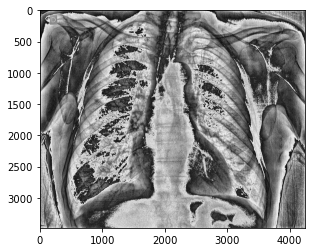

In [45]:
plt.imshow(im)

In [46]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

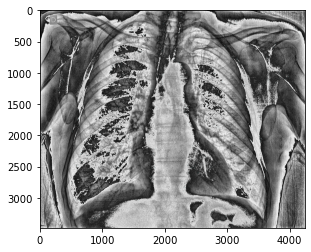

In [47]:
kp = sift.detect(im,None)
kp, des = sift.compute(im, kp)
img=draw_keypoints(im,kp)

In [48]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=sift.detect(im,None)
    keypoints,descriptor= sift.compute(im, kp)
    des_list.append((image_pat,descriptor))

KeyboardInterrupt: 

In [ ]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [ ]:
descriptors.shape

In [ ]:
descriptors_float=descriptors.astype(float)

In [ ]:
from scipy.cluster.vq import kmeans,vq

In [ ]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [ ]:
from scipy.cluster.vq import kmeans,vq

In [ ]:
k=200
voc,variance=kmeans(descriptors_float,k,1)

In [ ]:
im_features=np.zeros((len(image_paths),k),"float32")
for i in range(len(image_paths)):
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1

In [ ]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [ ]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

In [ ]:
des_list_test=[]

In [ ]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=sift.detect(image,None)
    keypoints_test,descriptor_test= sift.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [ ]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [ ]:
test_features

In [ ]:
test_features=stdslr.transform(test_features)

In [ ]:
y_test

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
y_pred

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.metrics import accuracy_score
clf = xgb.XGBClassifier()
clf.fit(im_features,np.array(y_train))

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import SGDClassifier

In [ ]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(im_features,np.array(y_train))

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(im_features,np.array(y_train))

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf.fit(im_features,np.array(y_train))

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(im_features,np.array(y_train))

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(im_features,np.array(y_train))

In [ ]:
y_pred=clf.predict(test_features)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))